<a href="https://colab.research.google.com/github/DGkurnia/discuss1/blob/main/Submisi_Akhir_BMLP_Derfansyah_Guswiranata_Kurnia_clus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perkenalan diri
## Nmaa: Derfansyah Guswiranata Kurnia
## email dicoding: weerakurnia@gmail.com
## Identitas dicoding : dgkurnia

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
#Pengunduhan perpustakaan untuk Dataset
import numpy as np
import pandas as pd
#Grafik
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Perpustakaan untuk Google drive demi impor data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#impor dataset untuk Data
airbnbdf = pd.read_csv('/content/drive/MyDrive/csv-files/airbnb-revi.csv') # skip bad lines
#Penyalinan data
airbnbc = airbnbdf.copy()

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
#persiapan perpustakaan
from sklearn.preprocessing import RobustScaler
#inspeksi nilai siluet

from sklearn.metrics import silhouette_score

In [ ]:
#inisiasi 'pelabelan banyak' dan 'identifikasi jarak'
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.spatial import distance

In [ ]:
#perpustakaan untuk interpolasi
from scipy.interpolate import interp1d

In [ ]:
#optsional 'kneed'
!pip install kneed
from kneed import KneeLocator

In [ ]:
#Perpustakaan untuk fungsi K-means
from sklearn.cluster import KMeans

Ini untuk Persiapan fungsi asli

In [ ]:
#seleksi K-means
from sklearn.feature_selection import SelectKBest

In [ ]:
#inisiasi category_encoders
!pip install category_encoders
import category_encoders as ce

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.7 MB/s eta 0:00:00


In [ ]:
#Silhouette visualizer
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
#Inspeksi data
airbnbc.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Ada 16 kolom

In [ ]:
#cek data hilang
airbnbc.isna().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Kolom yang hilang paling banyak adalah **'last_review'** dan **'reviews_per_month'**. Dua kolom ini penting untuk inspeksi analisis

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
#cek jenis data
airbnbc.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


Ada empat kolom dengan jenis data salah yaitu:
- kolom 'id'
- kolom 'host_id'
- kolom lintang ('latitude')
- kolom bujur ('lotitude')
Dua kolom ('id' dan 'host_id') akan diubah

In [ ]:
#Fungsi Inspeksi data
def countsplot(category):
  # Create count plot with dynamic title
  plt.figure(figsize = (10, 9))
  sns.countplot(data = airbnbc, x = category)
  plt.ylabel("Count")
  plt.title(f"{category} Distribution")
  plt.show()

  # Perhitungan nilai dan persentase
  category_counts = airbnbc[category].value_counts() #Nilai perhitungan
  category_percentages = airbnbc[category].value_counts(normalize = True) #Persentase

  # Penggabungan nilai dan persentase menjadi satu Data frama
  stats_df = pd.DataFrame({"Count": category_counts, "Proportion": category_percentages})
  stats_df["Count"] = stats_df["Count"].apply("{:,}".format)
  stats_df["Proportion"] = stats_df["Proportion"].apply("{:.1%}".format)

  return stats_df

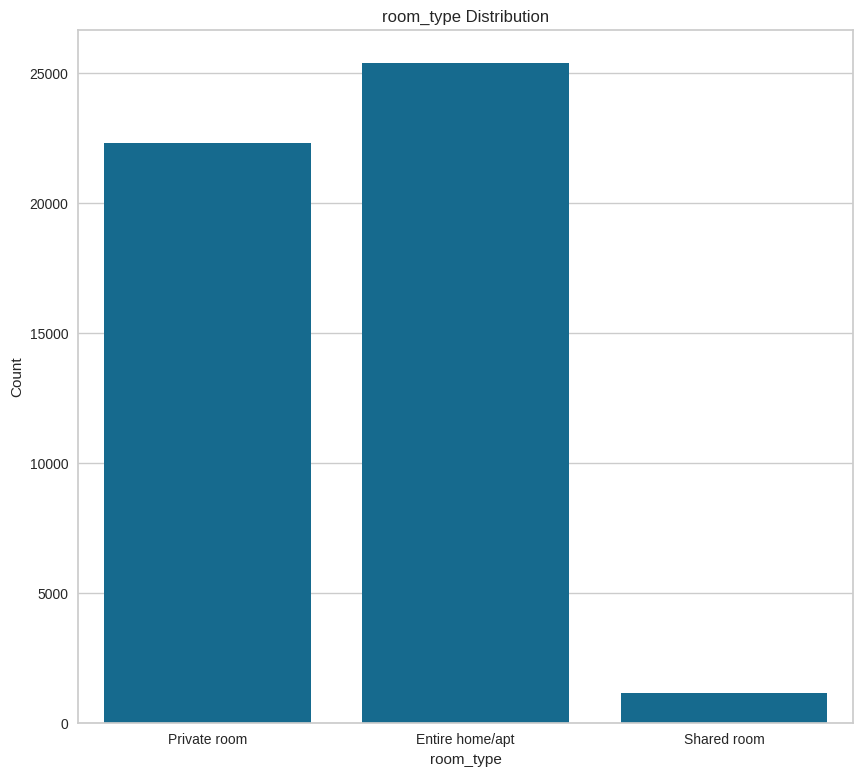

,Count,Proportion
room_type,,
Entire home/apt,"25,409",52.0%
Private room,"22,326",45.7%
Shared room,"1,160",2.4%


In [ ]:
#grafik implementasi data untuk jenis kamar
countsplot('room_type')

**Grafik ini** menjadi basis pemakaian kluster sebelum digabung

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Pergantian kolom identitas

In [ ]:
#tahap awal: pergantian dua jenis kolom melalui koversi identitas
airbnbc[['id','host_id']] = airbnbc[['id','host_id']].astype('str').copy()
airbnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  object 
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  object 
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

ke pengisian kolom tanggal, biaya, dan ulasan bulanan

In [ ]:
#tahap dua : pengurusan kolom tanggal
airbnbc['last_review'] = pd.to_datetime(airbnbc['last_review']).copy()
airbnbc['last_review'] = airbnbc['last_review'].fillna(pd.Timestamp(0)).copy() #tidak akan dipakai
airbnbc['price'].interpolate(method='nearest') #interpolasi 1 untuk biaya
airbnbc['price'].interpolate(method='linear') #interpolasi 1 untuk biaya
airbnbc['reviews_per_month'].interpolate(method='nearest')
airbnbc['reviews_per_month'].interpolate(method='linear')
airbnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  object        
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  object        
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [ ]:
#pengisian kolom kosong (Pengisian nilai untuk kolom tidak ada di data numerik)
airbnbc[['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count', 'availability_365']] = airbnbc[['minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count', 'availability_365']].fillna(0).copy()

# Pengubahan nilai kosong
airbnbc.replace([np.inf, -np.inf], 0, inplace=True)

# Konversi ke kolom angka
airbnbc[['minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count', 'availability_365']] = airbnbc[['minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count', 'availability_365']].astype('int64').copy()
airbnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  object        
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  object        
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [ ]:
#Pengisian data non numerik melalui pengisian kolom kosong di jenis data kata
airbnbc['name'].fillna('No Name') #kolom nama kamar
airbnbc['host_name'].fillna('Unidentified') #kolom nama pemilik
airbnbc[['neighbourhood_group', 'neighbourhood']] = airbnbc[['neighbourhood_group', 'neighbourhood']].fillna('Unknown') #Lokais dan Kota
airbnbc['room_type'].fillna('Unspecified')
airbnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  object        
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  object        
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

**Tujuan utama dari pemisahan adalah inspeksi untuk kluster nanti**

In [ ]:
#persiapan untuk penyiapa cluster
clsdf = airbnbc.iloc[:, 8:].copy()
clsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   room_type                       48895 non-null  object        
 1   price                           48895 non-null  int64         
 2   minimum_nights                  48895 non-null  int64         
 3   number_of_reviews               48895 non-null  int64         
 4   last_review                     48895 non-null  datetime64[ns]
 5   reviews_per_month               48895 non-null  int64         
 6   calculated_host_listings_count  48895 non-null  int64         
 7   availability_365                48895 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 3.0+ MB


aspek utama untuk kluster adalah 8 kolom ini yang terdiri dari
* **tiga** kolom kategorikal
* **lima** kolom numerikal

### Persiapan untuk cluster

In [ ]:
#cek hasil iloc
clsdf['room_type'] = clsdf['room_type'].astype('str').copy()
clsdf.head(8)

,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Private room,149,1,9,2018-10-19,0,6,365
1,Entire home/apt,225,1,45,2019-05-21,0,2,355
2,Private room,150,3,0,1970-01-01,0,1,365
3,Entire home/apt,89,1,270,2019-07-05,4,1,194
4,Entire home/apt,80,10,9,2018-11-19,0,1,0
5,Entire home/apt,200,3,74,2019-06-22,0,1,129
6,Private room,60,45,49,2017-10-05,0,1,0
7,Private room,79,2,430,2019-06-24,3,1,220


In [ ]:
#inisiasi labelanalyzer untuk kamar
clroom = clsdf['room_type'].copy()
clroom.head(6)

,room_type
0,Private room
1,Entire home/apt
2,Private room
3,Entire home/apt
4,Entire home/apt
5,Entire home/apt


Basis dari Multilabelanalyzer adalah inspeksi situasi kamar dengan banyak kondisi

In [ ]:
#inisiasi mlb
mlb = MultiLabelBinarizer()
clrconres = mlb.fit_transform(clroom)
clrconres = pd.DataFrame(clrconres, columns=mlb.classes_)
clrconres.head()

,,/,E,P,S,a,d,e,h,i,m,n,o,p,r,t,v
0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,1,1
1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0
2,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,1,1
3,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0
4,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0


In [ ]:
#Persiapan untuk 'Robust Scaler' di kolom numerik
numcol = clsdf[['minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count', 'availability_365']].copy()
#inisiasi 'robust scaler'
scaler = RobustScaler()
clsstd = scaler.fit_transform(numcol)
clsstd = pd.DataFrame(clsstd, columns=numcol.columns)
clsstd.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,-0.50,0.173913,0.0,5.0,1.409692
1,-0.50,1.739130,0.0,1.0,1.365639
2,0.00,-0.217391,0.0,0.0,1.409692
3,-0.50,11.521739,4.0,0.0,0.656388
4,1.75,0.173913,0.0,0.0,-0.198238


#### Basis untuk kluster adalah
- inspeksi harga
- malam minimal
- total ulasan
- ulasan per bulan
#### Aspek ini akan dibandingkan dengan kamar


data yang dipakai adalah 'clsdfcom' yang berasal dari gabungan data sebelumnya

In [ ]:
#penyatuan hasil kluster
clsdfcom = pd.concat([clsstd, clrconres], axis=1)
clsdfcom.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,,/,E,P,S,...,e,h,i,m,n,o,p,r,t,v
0,-0.50,0.173913,0.0,5.0,1.409692,1,0,0,1,0,...,1,0,1,1,0,1,0,1,1,1
1,-0.50,1.739130,0.0,1.0,1.365639,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,0
2,0.00,-0.217391,0.0,0.0,1.409692,1,0,0,1,0,...,1,0,1,1,0,1,0,1,1,1
3,-0.50,11.521739,4.0,0.0,0.656388,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,0
4,1.75,0.173913,0.0,0.0,-0.198238,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,0


Pemakaian mlb bisa bertujuan untuk memperoleh infomrasi yang sangat akurat

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#fungsi inspeksi kluster normal
def inspeksi_kluster(clsdfcom, cluster_range=range(2, 11), random_states=[1000], optsil=0.70, silmin=0.55):
    fig, ax = plt.subplots(5, 2, figsize=(20, 31))

    # Iterasi setaiap 'fasa acak'
    for random_state in random_states:
        print(f"Dengan fasa acak: {random_state}")

        # Bagian iterasi jumlah kluster
        for n_clusters in cluster_range:
            kmeanModel = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
            kmeanModel.fit(clsdfcom.values)

            q, mod = divmod(n_clusters, 2)
            sil = SilhouetteVisualizer(kmeanModel, is_fitted=True, ax=ax[q-1][mod])
            sil.fit(clsdfcom.values)
            sil.finalize()

            print(f"Kluster: {n_clusters}, NIlai siluet: {np.round(sil.silhouette_score_,4)}")

In [ ]:
#persiapan analisis hasil jadi
clsdft = clsdfcom.copy()
scaler = RobustScaler()
clsdfv = clsdft.values
clsdftres = scaler.fit_transform(clsdfv)

Komponen untuk analisis data asli adalah variable **'clsdfters'**

Dengan fasa acak: 1000
Kluster: 2, NIlai siluet: 0.9645
Kluster: 3, NIlai siluet: 0.9129
Kluster: 4, NIlai siluet: 0.8534
Kluster: 5, NIlai siluet: 0.8562
Kluster: 6, NIlai siluet: 0.8555
Kluster: 7, NIlai siluet: 0.3995
Kluster: 8, NIlai siluet: 0.5807
Kluster: 9, NIlai siluet: 0.2733
Kluster: 10, NIlai siluet: 0.281


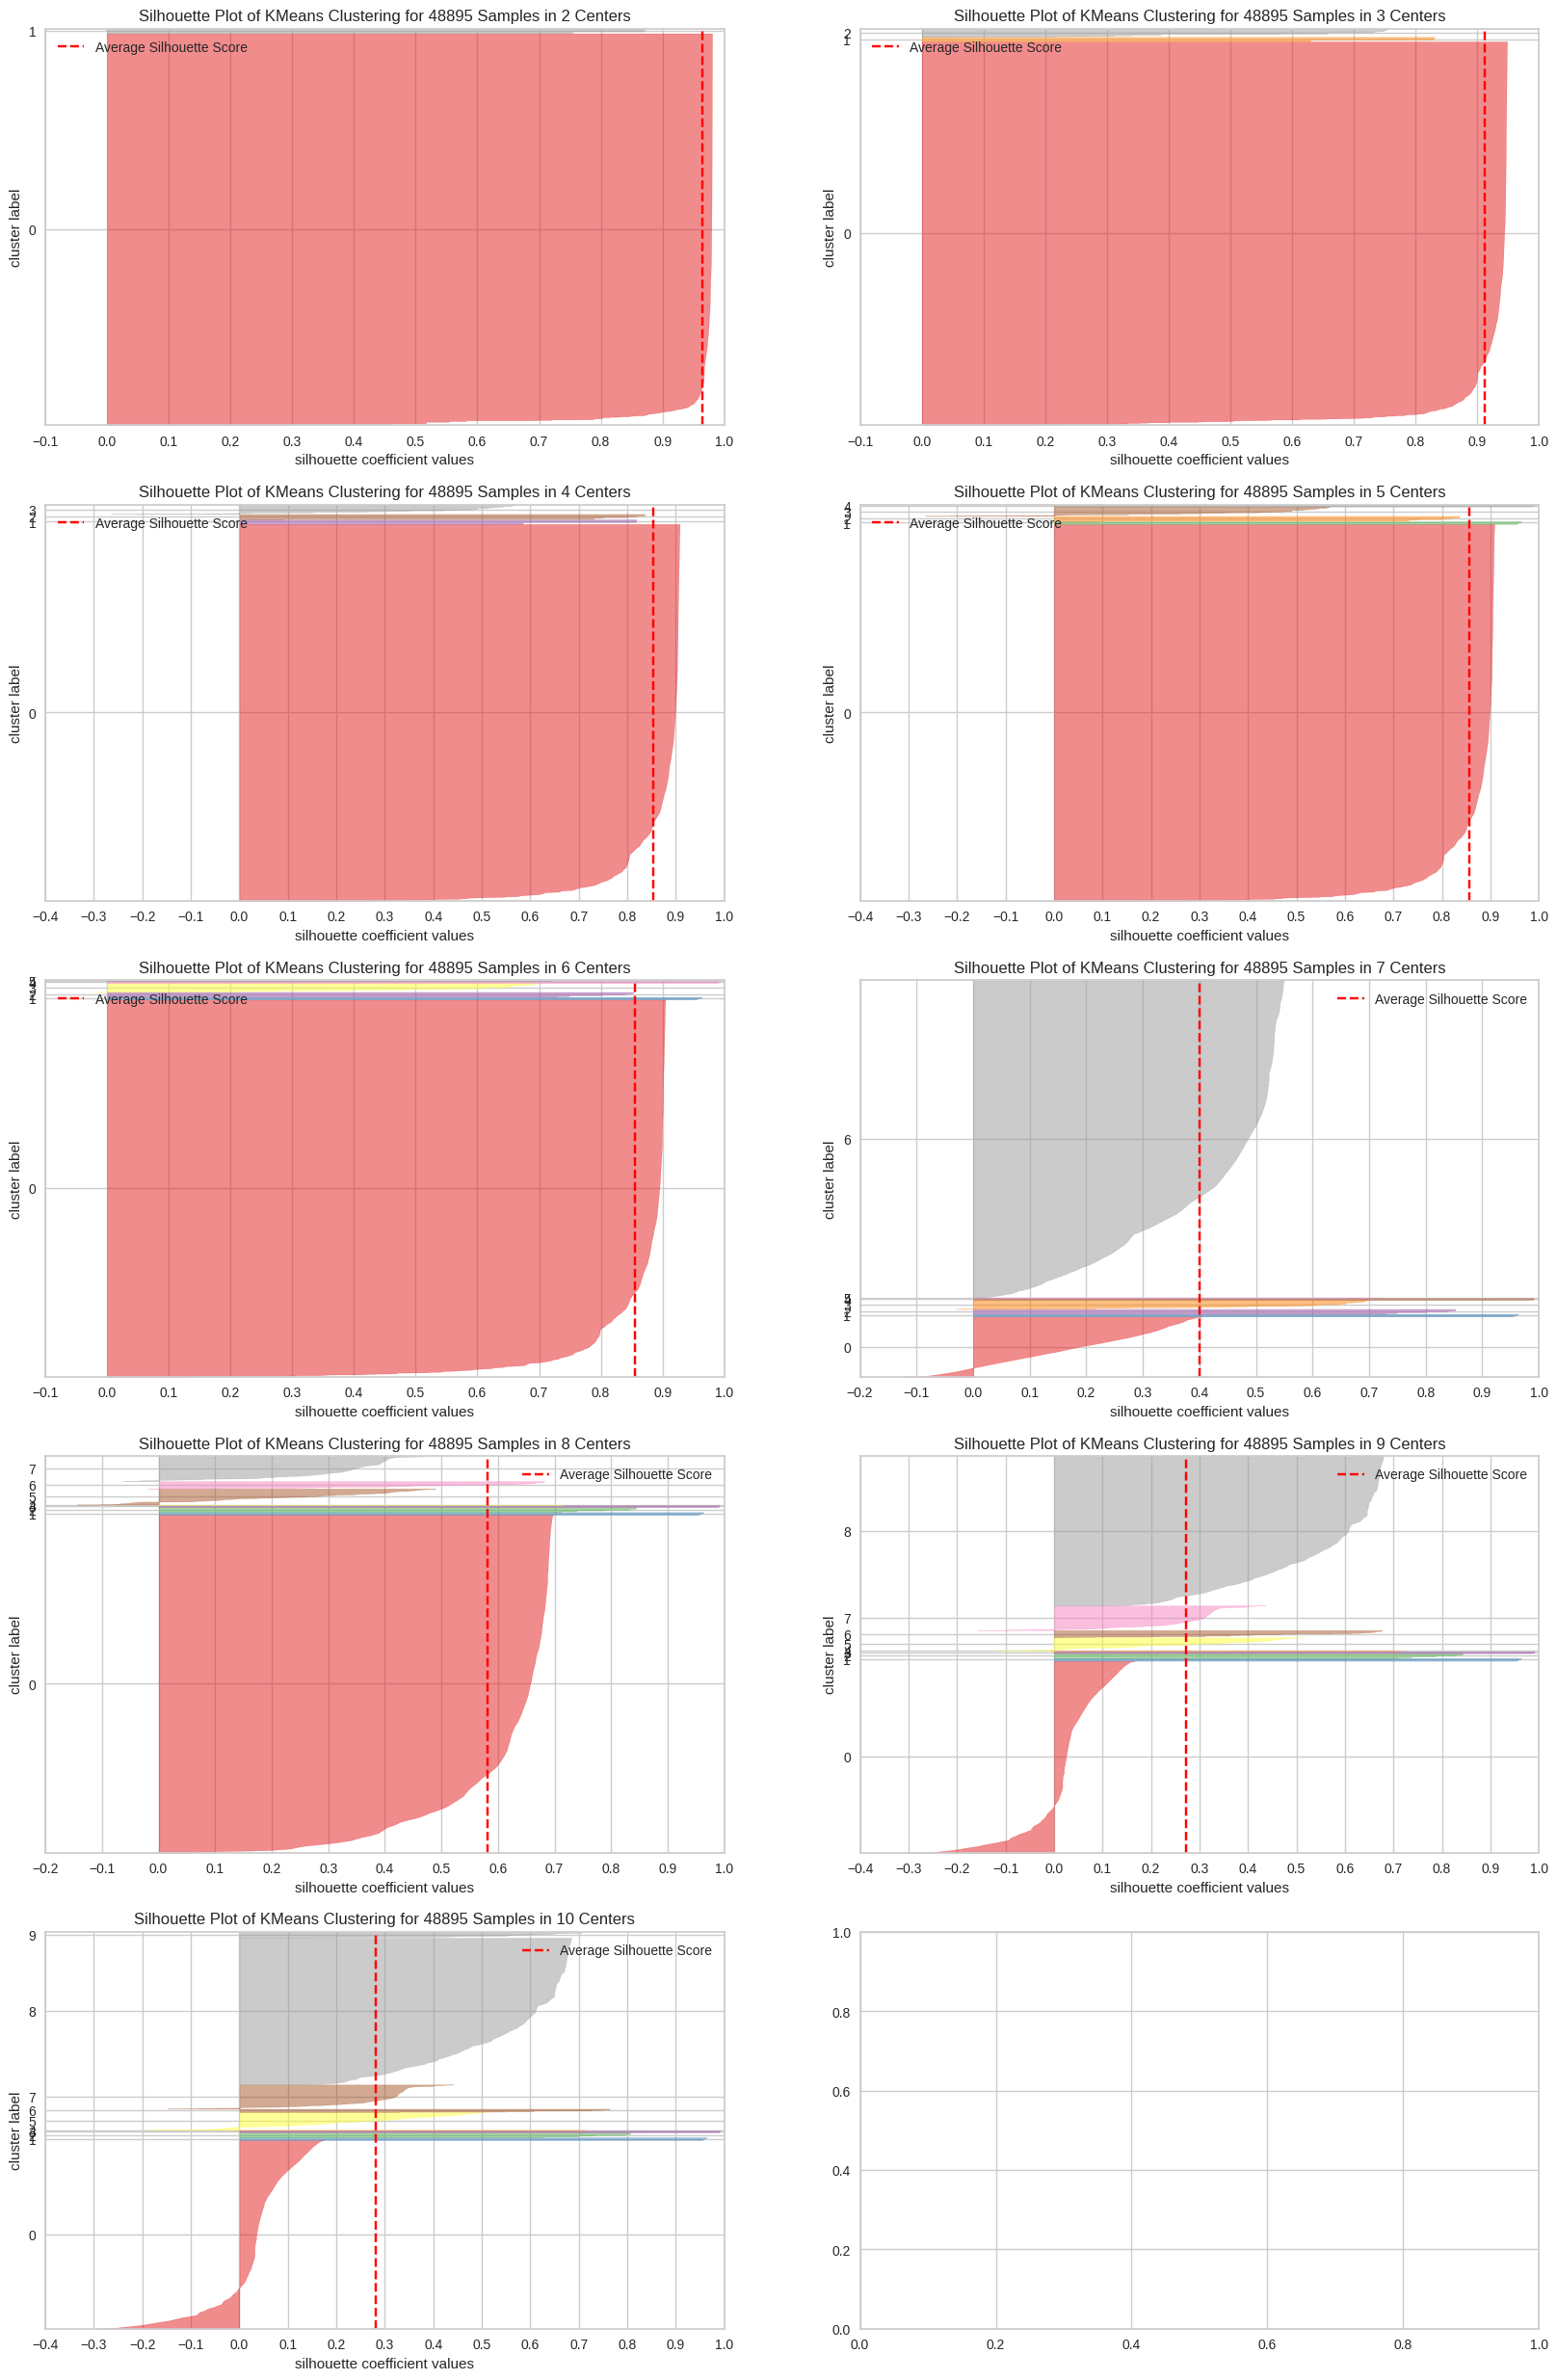

In [ ]:
#eksekusi hasil dataset jadi (optimasi normal)
nres = inspeksi_kluster(clsdfcom)

## Informasi kluster normal
* Hasil dari grafik menunjukan kecendrungan untuk kluster (4,5,6)
* Bagian **'consil'** dan **'coninet'** mendeklarasikan nilai konvesional
- Hasil 8 kluster masih memenuhi batas minimal (0.55), tapi 7 kluster masih berada di kluster **'optimal'**

In [ ]:
#pemeriksaan nilai siluet
def inspect_silhouette_score(data_scaled, dataset_name):
    silhouette_scores = []
    k_range = range(2, 11)  # Berawal dari 2

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        clusters = kmeans.fit_predict(data_scaled)
        score = silhouette_score(data_scaled, clusters)
        silhouette_scores.append(score)

        # Lihat Optimalisasi Kluster
        if score >= 0.70:
            print(f'Nilai siluet untuk k ={k} adalah {score:.3f} (>= 0.70) - Klustering Optimal yang Bagus!') #Batas optimal
        elif score >= 0.55:
            print(f'Nilai siluet untuk k={k} adalah {score:.3f} (>= 0.55) - Klustering Bagus!') # Batas minimal
        else:
            print(f'Nilai siluet untuk k={k} adalah {score:.3f} (< 0.55) - Penyetelan Nilai k.')

    # Bagian Ilustrasi
    plt.figure(figsize=(9, 6))
    plt.plot(k_range, silhouette_scores, marker='o', color='b')
    plt.title(f'Inspeksi Silhouette Score untuk Kluster - {dataset_name}')
    plt.xlabel('Total Kluster (k)')
    plt.ylabel('Nilai Siluet')
    plt.xticks(k_range)
    plt.axhline(y=0.70, color='b', linestyle='--', label='Rekomendasi : 0.70')
    plt.axhline(y=0.55, color='r', linestyle='--', label='Threshold: 0.55')
    plt.legend()
    plt.grid()
    plt.show()

Nilai siluet untuk k =2 adalah 0.965 (>= 0.70) - Klustering Optimal yang Bagus!
Nilai siluet untuk k =3 adalah 0.913 (>= 0.70) - Klustering Optimal yang Bagus!
Nilai siluet untuk k =4 adalah 0.915 (>= 0.70) - Klustering Optimal yang Bagus!
Nilai siluet untuk k =5 adalah 0.863 (>= 0.70) - Klustering Optimal yang Bagus!
Nilai siluet untuk k =6 adalah 0.856 (>= 0.70) - Klustering Optimal yang Bagus!
Nilai siluet untuk k =7 adalah 0.790 (>= 0.70) - Klustering Optimal yang Bagus!
Nilai siluet untuk k=8 adalah 0.568 (>= 0.55) - Klustering Bagus!
Nilai siluet untuk k=9 adalah 0.478 (< 0.55) - Penyetelan Nilai k.
Nilai siluet untuk k=10 adalah 0.492 (< 0.55) - Penyetelan Nilai k.


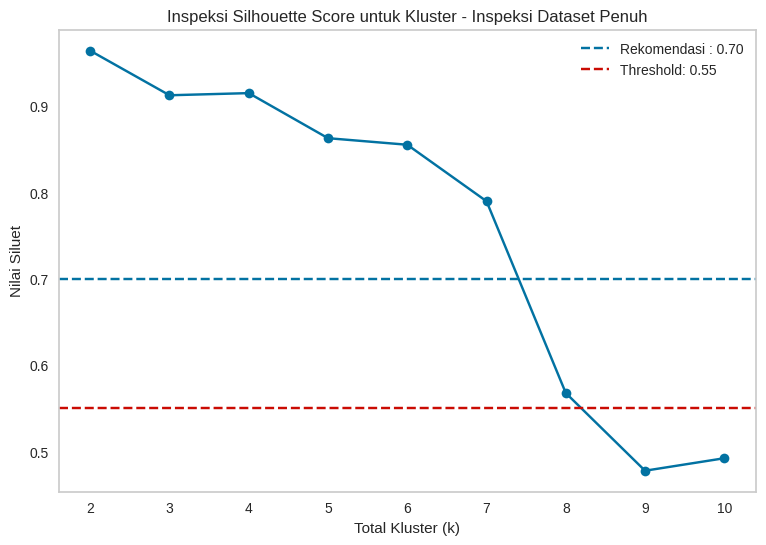

In [ ]:
#fungsi inspeksi untuk unit penuh normal
inspect_silhouette_score(clsdfcom,'Inspeksi Dataset Penuh')

- Grafik menunjukan penurunan tajam untuk bagian 6,7,8 kluster dengan kluster 7 masih menjadi kemungkinan kuat
-  Tujuh kluster bisa menjadi kemungkinan **(Untuk normal)**
- kluster terus menurun

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#perpustakaan tambahan untuk seleksi fitur
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
#Tahap awal melalui pembentukan fungsi 'seleksi fitur' di metode sikut dengan 'seleksi fitur'
def inspeksi_kluster_dengan_sf(data_scaled, dataset_name, n_features=5, cluster_range=range(2, 11), random_states=[1000], optsil=0.70, silmin=0.55):
    # Seleksi Fitur
    selector = SelectKBest(score_func=f_classif, k=n_features)
    data_selected = selector.fit_transform(data_scaled, np.zeros(data_scaled.shape[0]))

    # Insialisasi setiap fasa
    fig, ax = plt.subplots(5, 2, figsize=(20, 31))

    #Iterasi di setiap fasa
    for random_state in random_states:
        print(f"Dengan fasa acak: {random_state}")

        # Iterasi di jangkauan kluster
        for n_clusters in cluster_range:
            kmeanModel = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
            kmeanModel.fit(data_selected)

            q, mod = divmod(n_clusters, 2)
            try:
                sil = SilhouetteVisualizer(kmeanModel, is_fitted=True, ax=ax[q-1][mod])
                sil.fit(data_selected)
                sil.finalize()

                silhouette_score_value = np.round(silhouette_score(data_selected, kmeanModel.labels_), 4)
                print(f"Kluster: {n_clusters}, Nilai siluet: {silhouette_score_value}")

                # Check silhouette score against thresholds
                if np.isfinite(silhouette_score_value) and silhouette_score_value >= optsil:
                    print(f'Nilai siluet untuk k={n_clusters} adalah {silhouette_score_value:.3f} (>= {optsil}) - Klustering Optimal yang Bagus!')
                elif np.isfinite(silhouette_score_value) and silhouette_score_value >= silmin:
                    print(f'Nilai siluet untuk k={n_clusters} adalah {silhouette_score_value:.3f} (>= {silmin}) - Klustering Bagus!')
                else:
                    print(f'Nilai siluet untuk k={n_clusters} adalah {silhouette_score_value:.3f} (< {silmin}) - Penyetelan Nilai k.')
            except Exception as e:
                print(f"Error fitting Silhouette Visualizer: {e}")

    # Grafik inersia dan nilai siluet (pakai seleksi fitur)
    inertia = []
    silhouette_scores = []

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data_selected)

        inertia.append(kmeans.inertia_)

        if k > 1:
            score = silhouette_score(data_selected, kmeans.labels_)
            if np.isfinite(score):  # Check if score is finite before appending
                silhouette_scores.append(score)
                print(f'k={k}, Nilai siluet={score:.3f}')  # Inspeksi nilai siluet

    # Ilusstrasi hasil
    plt.figure(figsize=(9, 6))
    plt.plot(cluster_range[:len(inertia)], inertia, marker='o', label='Inersia')

    if len(silhouette_scores) > 1:
        plt.plot(cluster_range[1:len(silhouette_scores)], silhouette_scores[1:], marker='x', color='r', label='Silhouette Score')

    plt.title(f'Hasil Inspeksi untuk - {dataset_name}')
    plt.xlabel('Total kluster (k)')
    plt.ylabel('Inersia / nilai siluet')
    plt.xticks(cluster_range)

    plt.axhline(y=optsil, color='b', linestyle='--', label='Nilai rekomendasi (0.7)')
    plt.axhline(y=silmin, color='r', linestyle='--', label='Nilai minimal (0.55)')

    plt.legend()
    plt.grid()
    #tampilkan grafik
    plt.show()

In [ ]:
#Inspeksi nilai siluet dengan 'seleksi fitur'
def plot_fscale_silsc(data_scaled, dataset_name, n_features=5):
    # Feature selection
    selector = SelectKBest(score_func=f_classif, k=n_features)
    data_selected = selector.fit_transform(data_scaled, np.zeros(data_scaled.shape[0]))  # Target minimal

    silhouette_scores = []
    k_range = range(2, 11)  # Nilai Mimimal kluster

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        clusters = kmeans.fit_predict(data_selected)
        score = silhouette_score(data_selected, clusters)
        silhouette_scores.append(score)

        # Pemeriksaan Nilai Siluet
        if score >= 0.70:
            print(f'Nilai siluet untuk k={k} is {score:.3f} (>= 0.70) - Klustering Optimal yang Bagus!')
        elif score >= 0.55:
            print(f'Nilai siluet untuk k={k} is {score:.3f} (>= 0.55) - Klustering Bagus!')
        else:
            print(f'Nilai siluet untuk k={k} is {score:.3f} (< 0.55) - Penyetelan Nilai k.')

    # Ilustrasi
    plt.figure(figsize=(9, 6))
    plt.plot(k_range, silhouette_scores, marker='o', color='b')
    plt.title(f'Inspeksi Silhouette Score untuk Kluster - {dataset_name}')
    plt.xlabel('Total Kluster (k)')
    plt.ylabel('Nilai Inersia/Siluet')
    plt.xticks(k_range)
    plt.axhline(y=0.70, color='b', linestyle='--', label='Optimal : 0.55')
    plt.axhline(y=0.55, color='r', linestyle='--', label='Minimal: 0.55')
    plt.legend()
    plt.grid()
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


Dengan fasa acak: 1000
Kluster: 2, Nilai siluet: 0.9549
Nilai siluet untuk k=2 adalah 0.955 (>= 0.7) - Klustering Optimal yang Bagus!
Kluster: 3, Nilai siluet: 1.0
Nilai siluet untuk k=3 adalah 1.000 (>= 0.7) - Klustering Optimal yang Bagus!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Kluster: 4, Nilai siluet: 1.0
Nilai siluet untuk k=4 adalah 1.000 (>= 0.7) - Klustering Optimal yang Bagus!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Kluster: 5, Nilai siluet: 1.0
Nilai siluet untuk k=5 adalah 1.000 (>= 0.7) - Klustering Optimal yang Bagus!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Kluster: 6, Nilai siluet: 1.0
Nilai siluet untuk k=6 adalah 1.000 (>= 0.7) - Klustering Optimal yang Bagus!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Kluster: 7, Nilai siluet: 1.0
Nilai siluet untuk k=7 adalah 1.000 (>= 0.7) - Klustering Optimal yang Bagus!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Kluster: 8, Nilai siluet: 1.0
Nilai siluet untuk k=8 adalah 1.000 (>= 0.7) - Klustering Optimal yang Bagus!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Kluster: 9, Nilai siluet: 1.0
Nilai siluet untuk k=9 adalah 1.000 (>= 0.7) - Klustering Optimal yang Bagus!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Kluster: 10, Nilai siluet: 1.0
Nilai siluet untuk k=10 adalah 1.000 (>= 0.7) - Klustering Optimal yang Bagus!
k=2, Nilai siluet=0.955
k=3, Nilai siluet=1.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


k=4, Nilai siluet=1.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


k=5, Nilai siluet=1.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


k=6, Nilai siluet=1.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


k=7, Nilai siluet=1.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


k=8, Nilai siluet=1.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


k=9, Nilai siluet=1.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


k=10, Nilai siluet=1.000


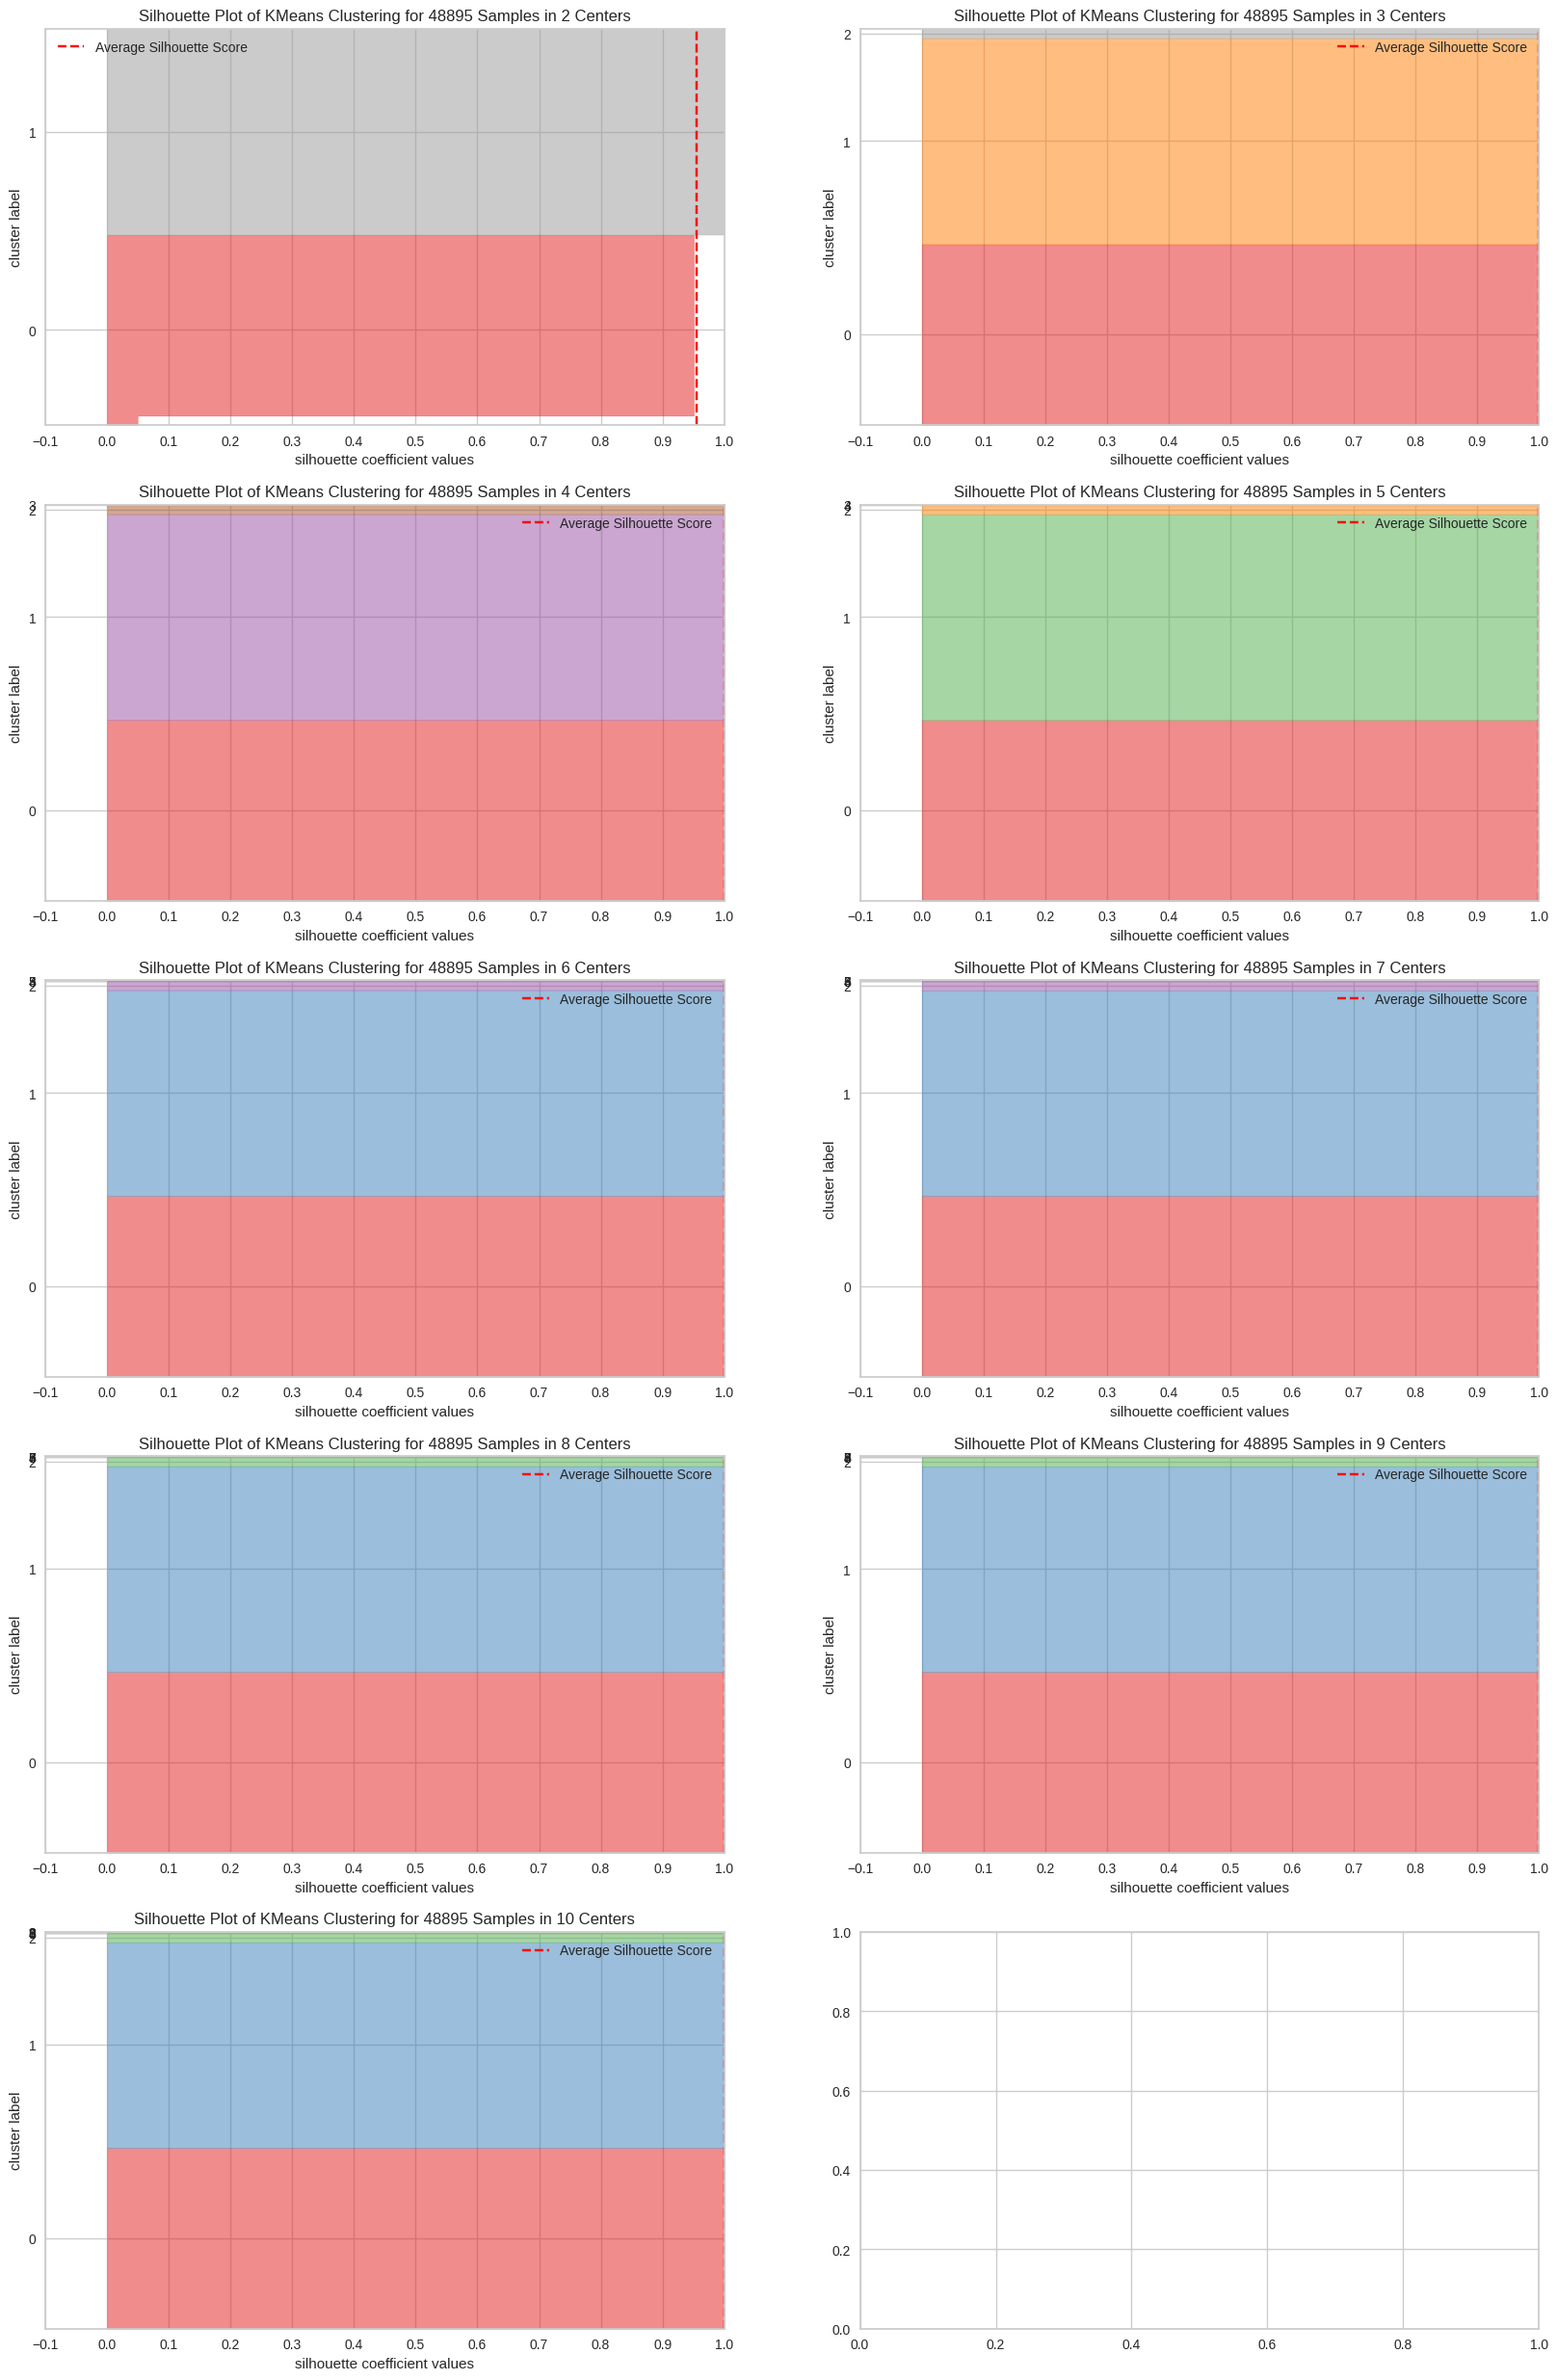

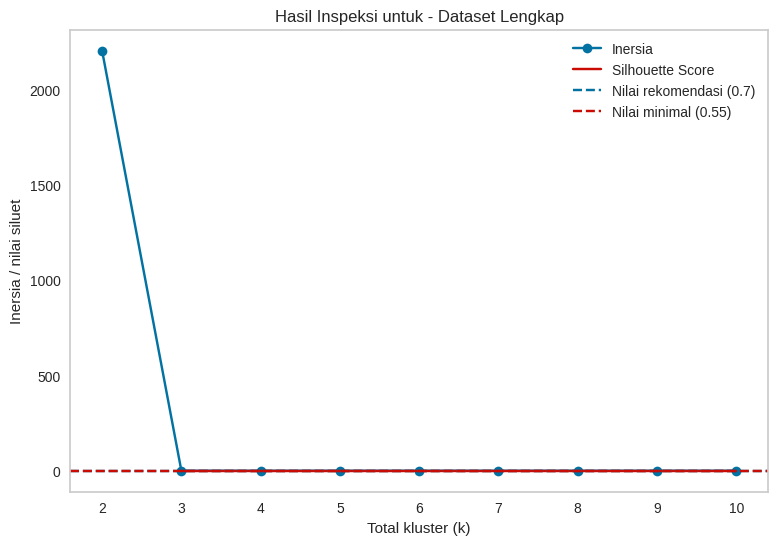

In [ ]:
#Cek hasil setelah penyetelan skala
sfresult = inspeksi_kluster_dengan_sf(clsdfcom, 'Dataset Lengkap', n_features=5)

## Inspeksi inersia dan momen pasca seleksi
- Nilai **'sfsil'** dan **'sfinet'** untuk kondisi pasca 'seleksi fitur'
- Nilai siluet mengalami ketidak stabilan dari kondisi **Normal**
- Kasus ini muncul dari kluster **'optimal'**

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


Nilai siluet untuk k=2 is 0.955 (>= 0.70) - Klustering Optimal yang Bagus!
Nilai siluet untuk k=3 is 1.000 (>= 0.70) - Klustering Optimal yang Bagus!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Nilai siluet untuk k=4 is 1.000 (>= 0.70) - Klustering Optimal yang Bagus!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Nilai siluet untuk k=5 is 1.000 (>= 0.70) - Klustering Optimal yang Bagus!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Nilai siluet untuk k=6 is 1.000 (>= 0.70) - Klustering Optimal yang Bagus!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Nilai siluet untuk k=7 is 1.000 (>= 0.70) - Klustering Optimal yang Bagus!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Nilai siluet untuk k=8 is 1.000 (>= 0.70) - Klustering Optimal yang Bagus!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Nilai siluet untuk k=9 is 1.000 (>= 0.70) - Klustering Optimal yang Bagus!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Nilai siluet untuk k=10 is 1.000 (>= 0.70) - Klustering Optimal yang Bagus!


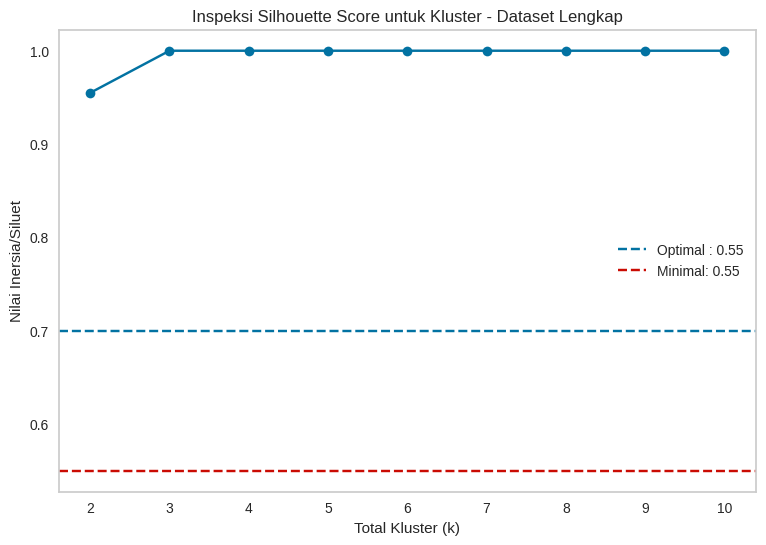

In [ ]:
#cek hasil setelah penyetelan skala
plot_fscale_silsc(clsdfcom, 'Dataset Lengkap')

### Inspeksi nilai siluet pasca seleksi fitur
* Grafik menunjukan penaikan tajam.
* Tujuh kluster bisa menjadi kemungkinan **(Untuk normal)**

### Perbandingan hasil 'seleksi fitur' dengan hasil normal

In [ ]:
#perpustakaan tambahan
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


Dengan fase acak: 1000
Klaster: 2, Nilai Siluet: 0.965
Klaster: 3, Nilai Siluet: 0.913
Klaster: 4, Nilai Siluet: 0.853
Klaster: 5, Nilai Siluet: 0.856
Klaster: 6, Nilai Siluet: 0.856
Klaster: 7, Nilai Siluet: 0.400
Klaster: 8, Nilai Siluet: 0.581
Klaster: 9, Nilai Siluet: 0.273
Klaster: 10, Nilai Siluet: 0.281
Dengan fase acak: 1000
Kluster: 2, Nilai Siluet (seleksi fitur): 0.955
Kluster: 3, Nilai Siluet (seleksi fitur): 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Kluster: 4, Nilai Siluet (seleksi fitur): 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Kluster: 5, Nilai Siluet (seleksi fitur): 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Kluster: 6, Nilai Siluet (seleksi fitur): 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Kluster: 7, Nilai Siluet (seleksi fitur): 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Kluster: 8, Nilai Siluet (seleksi fitur): 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Kluster: 9, Nilai Siluet (seleksi fitur): 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Kluster: 10, Nilai Siluet (seleksi fitur): 1.000


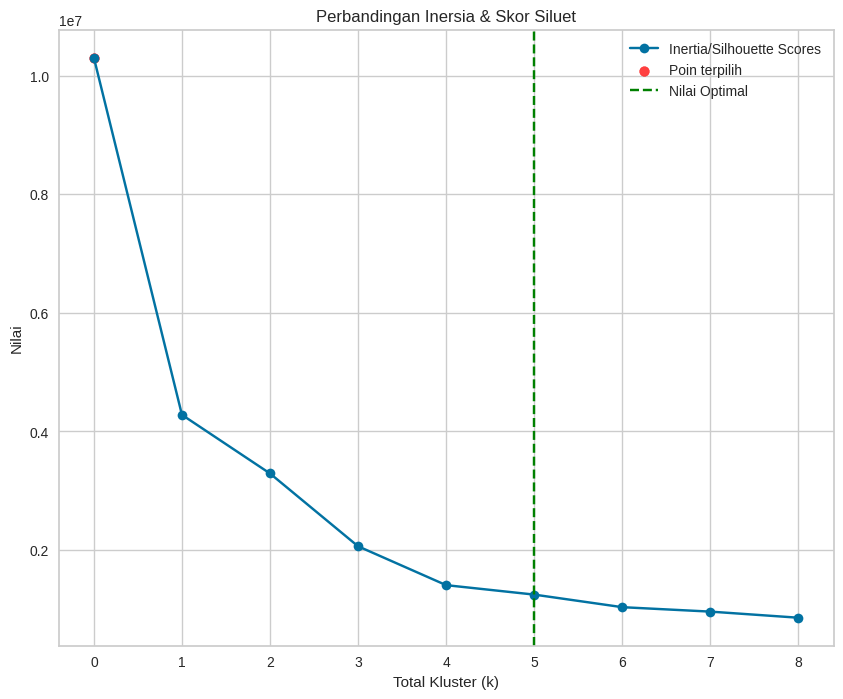

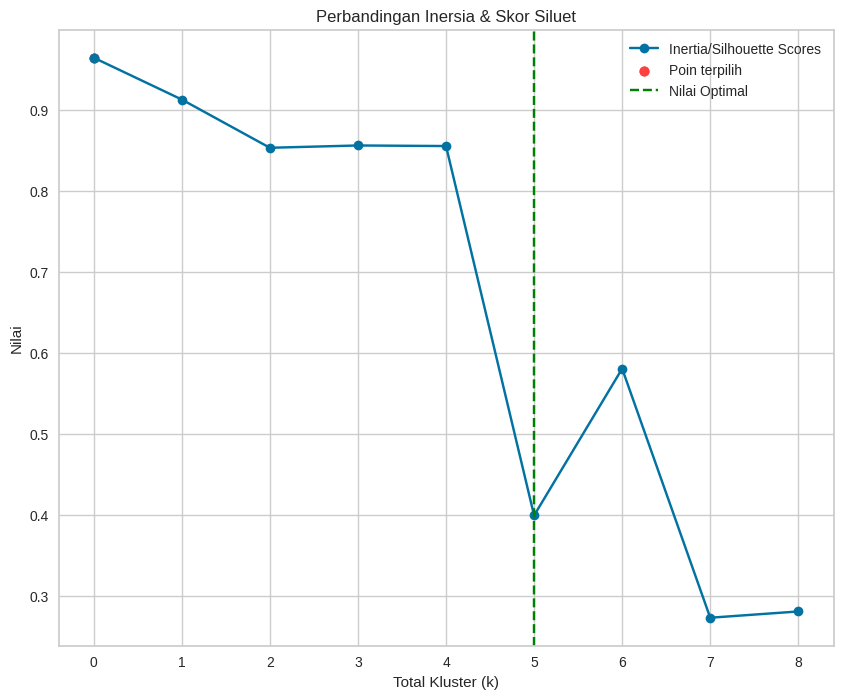

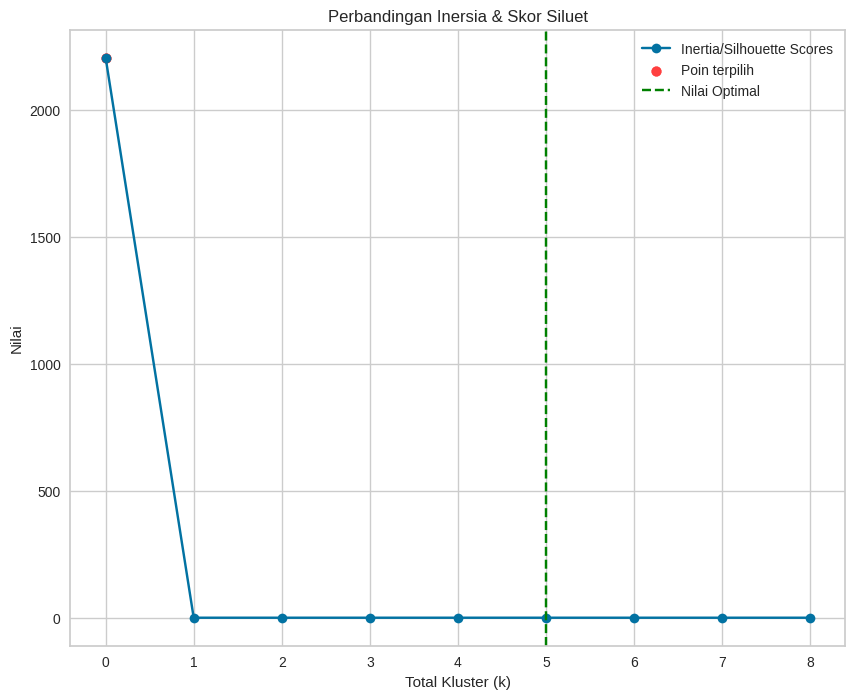

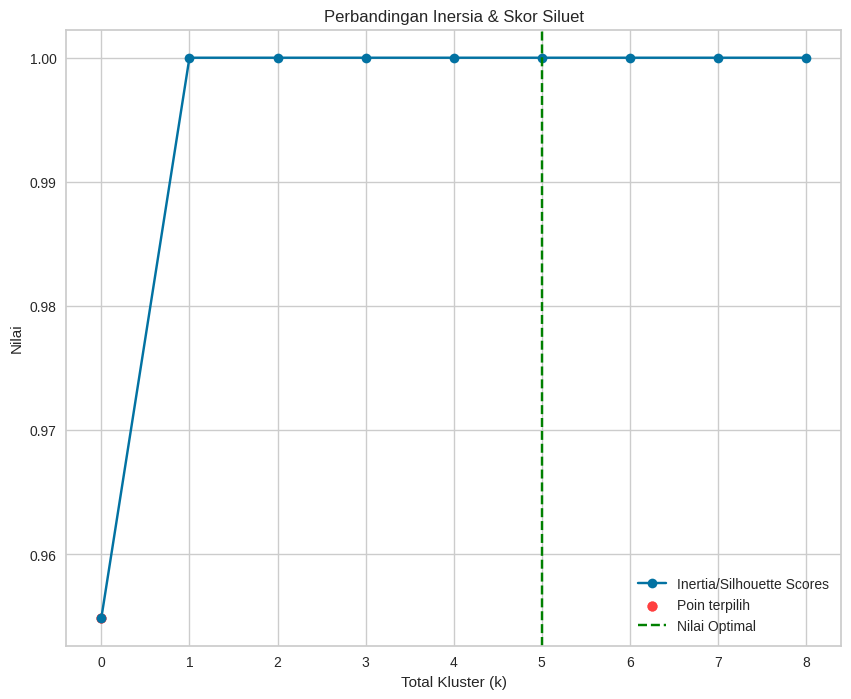

In [ ]:
# Perbandingan antara hasil biasa dengan hasil 'skala fitur' (fungsi)
def plot_inertia_silhouette(scores, labels=None):
    plt.figure(figsize=(10, 8))
    plt.plot(range(len(scores)), scores, marker='o', label='Inertia/Silhouette Scores')

    if labels is not None:
        plt.scatter(range(len(labels)), [scores[i] for i in range(len(labels))], c=['red'], s=50, alpha=0.75, label='Poin terpilih')

    plt.title("Perbandingan Inersia & Skor Siluet")
    plt.xlabel("Total Kluster (k)")
    plt.ylabel("Nilai")
    plt.xticks(range(len(scores)))

    plt.axvline(x=len(scores)//2 + 1, color='green', linestyle='--', label="Nilai Optimal")

    plt.legend()
    plt.grid(True)
    plt.show()

# Fungsi perbandingan
def compare_cluster_functions(df_compressed, dataset_name, n_features=5,
                               cluster_range=range(2, 11),
                               random_states=[1000],
                               opt_threshold=0.70,
                               min_threshold=0.55):

    # Seleksi
    selector = SelectKBest(score_func=f_classif, k=n_features)
    df_selected = selector.fit_transform(df_compressed, np.zeros(df_compressed.shape[0]))

    # Inisialisasi hasil
    inertias_conventional = []
    silhouette_scores_conventional = []

    inertias_feature_selective = []
    silhouette_scores_feature_selective = []

    # Eksekusi hasil konvensional
    for random_state in random_states:
        print(f"Dengan fase acak: {random_state}")

        for n_clusters in cluster_range:
            k_mean_model_conventional = KMeans(n_clusters=n_clusters,
                                                 random_state=random_state,
                                                 init='k-means++',
                                                 max_iter=300,
                                                 tol=1e-04)

            k_mean_model_conventional.fit(df_compressed)

            inertia_val_conventional = k_mean_model_conventional.inertia_
            inertias_conventional.append(inertia_val_conventional)

            if n_clusters > 1:
                silhouette_score_val_conventional = silhouette_score(df_compressed,
                                                                     k_mean_model_conventional.labels_,
                                                                     metric='euclidean')

                if np.isfinite(silhouette_score_val_conventional):
                    silhouette_scores_conventional.append(silhouette_score_val_conventional)
                    print(f"Klaster: {n_clusters}, Nilai Siluet: {silhouette_score_val_conventional:.3f}")

    # Eksekusi hasil 'fitur seleksi'
    for random_state in random_states:
        print(f"Dengan fase acak: {random_state}")

        for n_clusters in cluster_range:
            k_mean_model_feature_selective = KMeans(n_clusters=n_clusters,
                                                     random_state=random_state,
                                                     init='k-means++',
                                                     max_iter=300,
                                                     tol=1e-04)

            k_mean_model_feature_selective.fit(df_selected)

            inertia_val_feature_selective = k_mean_model_feature_selective.inertia_
            inertias_feature_selective.append(inertia_val_feature_selective)

            if n_clusters > 1:
                silhouette_score_value_feature_selective = np.round(silhouette_score(df_selected,
                                                                                    k_mean_model_feature_selective.labels_), 4)

                print(f'Kluster: {n_clusters}, Nilai Siluet (seleksi fitur): {silhouette_score_value_feature_selective:.3f}')

                silhouette_scores_feature_selective.append(silhouette_score_value_feature_selective)

    # Ilustrasi grafik
    plot_inertia_silhouette(scores=inertias_conventional, labels=["Konvensional"])
    plot_inertia_silhouette(scores=silhouette_scores_conventional, labels=["Konvensional"])

    plot_inertia_silhouette(scores=inertias_feature_selective, labels=["Dengan Seleksi Fitur"])
    plot_inertia_silhouette(scores=silhouette_scores_feature_selective, labels=["Dengan Seleksi Fitur"])

# Eksekusi
compare_cluster_functions(clsdfcom, 'Dataset Lengkap')

Hasil kluster yang akan dipakai tetap 7 walau perbandingan antara fungsi normal dan fungsi dengan seleksi fitur **'meyakinkan untuk 5'**.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#tahap 'standard scaler' untuk inspeksi penyebaran
stdscaler = StandardScaler()
clsstd = stdscaler.fit_transform(clsdfcom)
clsstd = pd.DataFrame(clsstd, columns=clsdfcom.columns)
clsstd.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,,/,E,P,S,...,e,h,i,m,n,o,p,r,t,v
0,-0.293996,-0.320414,-0.536521,-0.034716,1.916250,0.0,-1.040134,-1.040134,1.090893,-0.155887,...,0.0,-1.090893,0.155887,0.0,-1.040134,0.0,-1.040134,0.0,0.155887,1.090893
1,-0.293996,0.487665,-0.536521,-0.156104,1.840275,0.0,0.961415,0.961415,-0.916680,-0.155887,...,0.0,0.916680,0.155887,0.0,0.961415,0.0,0.961415,0.0,0.155887,-0.916680
2,-0.196484,-0.522433,-0.536521,-0.186451,1.916250,0.0,-1.040134,-1.040134,1.090893,-0.155887,...,0.0,-1.090893,0.155887,0.0,-1.040134,0.0,-1.040134,0.0,0.155887,1.090893
3,-0.293996,5.538156,2.125263,-0.186451,0.617065,0.0,0.961415,0.961415,-0.916680,-0.155887,...,0.0,0.916680,0.155887,0.0,0.961415,0.0,0.961415,0.0,0.155887,-0.916680
4,0.144807,-0.320414,-0.536521,-0.186451,-0.856865,0.0,0.961415,0.961415,-0.916680,-0.155887,...,0.0,0.916680,0.155887,0.0,0.961415,0.0,0.961415,0.0,0.155887,-0.916680


In [ ]:
#penyetalan model PCA
pca = PCA(n_components=0.90)

# Transformasi untuk PCA
clspca = pca.fit_transform(clsstd)

In [ ]:
#Tahap penjelasan informasi
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
#ke hasil

In [ ]:
#cetak hasil
print("Penjelasan komponen PCA dari berbagai variasi:", np.round(explained_variance,3))
print("Komponen PCA yang dijelaskan secara kumulatif:", np.round(cumulative_variance,3))

Penjelasan komponen PCA dari berbagai variasi: [0.43  0.26  0.103 0.082 0.055]
Komponen PCA yang dijelaskan secara kumulatif: [0.43  0.689 0.792 0.875 0.929]


Explained Variance Ratio: [0.42963472 0.25963885 0.10299214 0.08237575 0.05461571]


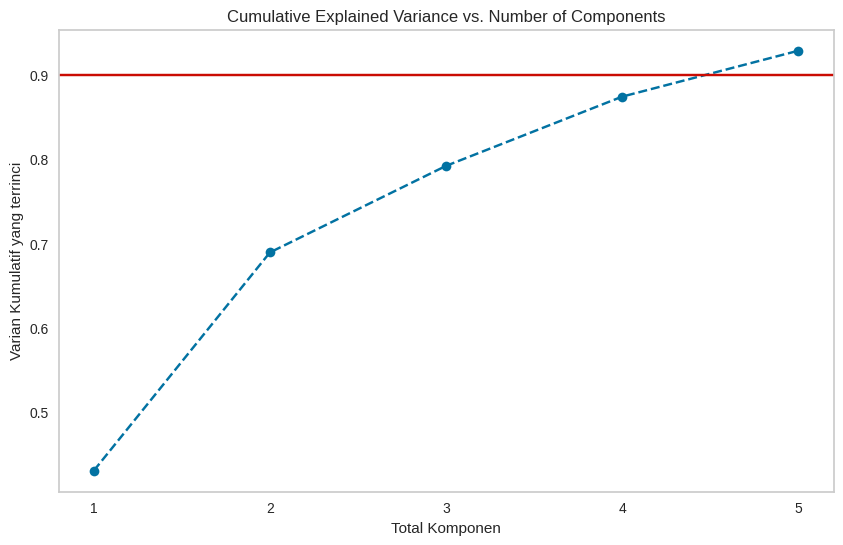

In [ ]:
#inspeksi hasil variatif kumulasi
print("Explained Variance Ratio:", explained_variance)

# Step 4: Visualisasi kumulatif variasi
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-')  # Batas tershold 90%
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Total Komponen')
plt.ylabel('Varian Kumulatif yang terrinci')
plt.grid()
plt.xticks(range(1, len(cumulative_variance) + 1))  # Referensi
plt.show()

Untuk nilai PCA = 0.9, komponen yang ideal adalah 4

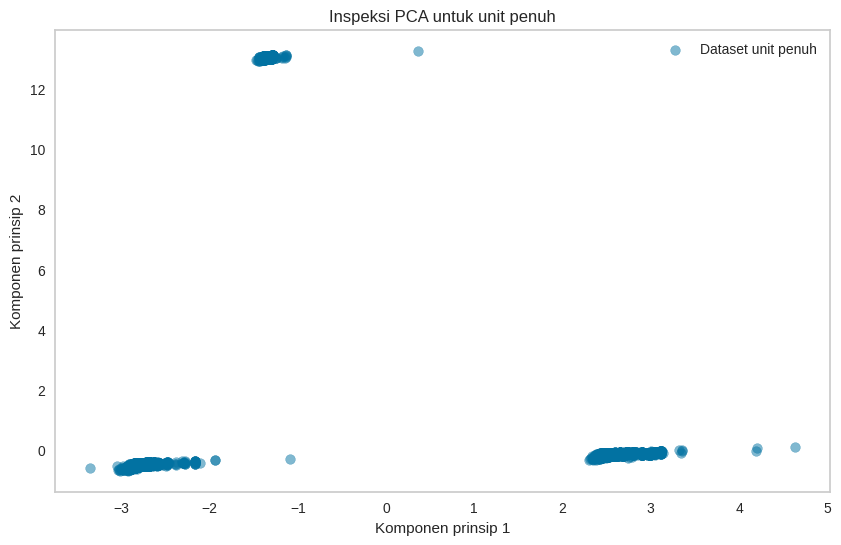

In [ ]:
#Tahap visualisasi hasil PCA (variasi referensi 1)
plt.figure(figsize=(10, 6))

# Plot for fdf_pca
plt.scatter(clspca[:, 0], clspca[:, 1], alpha=0.5, label='Dataset unit penuh')
plt.title('Inspeksi PCA untuk unit penuh')
plt.xlabel('Komponen prinsip 1')
plt.ylabel('Komponen prinsip 2')
plt.legend()
plt.grid()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Inspeksi Analisis data total ('persiapan Kmeans')
kmeany = KMeans(n_clusters= 7, random_state = 1000, n_init='auto')

Bedasarkan hasil 'cluster'

In [ ]:
#eksekusi K-means sesungguhnya
kmres = kmeany.fit_predict(clsdfv)

Aspek **'clsdfv'** adalah nilai dataset yang sudah diedit dengan **"Robust Scaler"**

In [ ]:
#Persiapan inspeksi kluster
airbnbc['Cluster'] = kmres

In [ ]:
#pemeriksaan dataset dari kluster (inspeksi kluster)
finres = airbnbc.sort_values(['room_type','Cluster']).copy()

In [ ]:
#cek beberapa sel
finres.head(9)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Cluster
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4,1,194,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1,4,188,0
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1,1,46,0
16,7097,Perfect for Your Parents + Garden,17571,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,215,2,198,2019-06-28,1,1,321,0
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4,1,21,0
24,8490,"MAISON DES SIRENES1,bohemian apartment",25183,Nathalie,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,Entire home/apt,120,2,88,2019-06-19,0,2,233,0
37,11708,Cute apt in artist's home,44145,Tyrome,Brooklyn,Bushwick,40.70186,-73.92745,Entire home/apt,85,2,231,2019-06-22,1,2,22,0
44,12343,BEST BET IN HARLEM,47727,Earl,Manhattan,Harlem,40.81175,-73.94478,Entire home/apt,150,7,97,2019-06-13,0,1,309,0
53,14314,Greenpoint Place...Has It All!,56246,Jeanne,Brooklyn,Greenpoint,40.73506,-73.95392,Entire home/apt,144,2,328,2019-06-29,2,1,234,0


Hasil jadi akan menggunakan nama **"finres"**

In [ ]:
#cek jumlah cluster dalam bentuk tabel
roomtab = finres.groupby(['room_type','Cluster']).size().unstack(fill_value=0).copy()
roomtab.head(9)

Cluster,0,1,2,3,4,5,6
room_type,,,,,,,
Entire home/apt,3644,319,492,711,232,50,19961
Private room,3646,8,102,334,0,23,18213
Shared room,152,0,0,44,0,1,963


### Inspeksi hasil kluster
- Kluster **6** sangat mendominasi
- Total data di kluster 5 **sangat sedikit**

In [ ]:
#Pergantian Nama untuk interpretasi
finres['Cluster'] = finres['Cluster'].replace([0,1,2,3,4,5,6],
 ['unit asing','unit kurang populer','opsi pelancong irit','sesi unit favorit di musim tertentu',
  'bisa untuk portofolio pemilik','unit sangat direkomendasikan','ada perencanaan dulu']).copy()
#cek penamaan kolom
finres.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Cluster
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4,1,194,unit asing
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1,4,188,unit asing
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1,1,46,unit asing
16,7097,Perfect for Your Parents + Garden,17571,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,215,2,198,2019-06-28,1,1,321,unit asing
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4,1,21,unit asing
24,8490,"MAISON DES SIRENES1,bohemian apartment",25183,Nathalie,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,Entire home/apt,120,2,88,2019-06-19,0,2,233,unit asing
37,11708,Cute apt in artist's home,44145,Tyrome,Brooklyn,Bushwick,40.70186,-73.92745,Entire home/apt,85,2,231,2019-06-22,1,2,22,unit asing
44,12343,BEST BET IN HARLEM,47727,Earl,Manhattan,Harlem,40.81175,-73.94478,Entire home/apt,150,7,97,2019-06-13,0,1,309,unit asing
53,14314,Greenpoint Place...Has It All!,56246,Jeanne,Brooklyn,Greenpoint,40.73506,-73.95392,Entire home/apt,144,2,328,2019-06-29,2,1,234,unit asing
63,16326,Comfortable 4-bedroom apt in family house.,63588,Dimitri,Brooklyn,Prospect Heights,40.67811,-73.96428,Entire home/apt,200,30,143,2019-01-26,1,2,297,unit asing


In [ ]:
#cak inspeksi kluster setelah penamaan
roomtabmk2 = finres.groupby(['room_type','Cluster']).size().unstack(fill_value=0).copy()
roomtabmk2.head(9)

Tulis hasil interpretasinya di sini.
1. Cluster 0: unit asing
2. Cluster 1: unit kurang populer
3. Cluster 2: opsi pelancong irit
4. Cluster 3: sesi unit favorit di musim tetentu
5. Cluster 4: bisa untuk fotopolio pemilik
6. Cluster 5: unit sangat direkomendasikan
7. Cluster 6: ada perencanaan dulu

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
#penyimpanan hasil
cairbnb = finres.to_csv('clusairbnb.csv', index=False)

### Ke bagian klasifikasi